## Segmenting and Clustering Neighborhoods in Toronto
### Peer Graded Assignment

In this project we will be clustering Toronto neighborhoods.

First, lets build the code to scrape the table of postal codes and then transform that data into a pandas dataframe.
The table is found in the following Wikipedia page: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

We will be using **Beautiful Soup** which is a Python library for pulling data out of HTML and XML files. It will save us a lot of time for this task!

In [1]:
import numpy as np
import pandas as pd
import wikipedia as wp
from bs4 import BeautifulSoup
import requests

To create the data frame:
- The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
- Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table.
- If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.
- Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
- In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

#### 1) Get the data
With the wikipedia library we just need to write the name of the article.

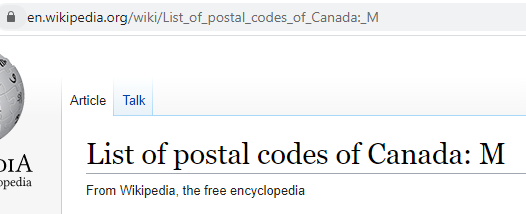


In [2]:
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html)[0]

Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [3]:
df = df[df.Borough!= "Not assigned"]

The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood.

Lets combine them.

In [4]:
df = df.groupby(['Postal Code', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [5]:
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

We Define columns, instantiate Dataframe and show how it looks

In [6]:
column_names = ['Postcode','Borough', 'Neighborhood'] 
df.columns = column_names
df.head(12)

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [7]:
df.shape

(103, 3)

### 2) Get Coordinates
We can easily use **io** library to decode the coordinates from the csv file and then use the **join** method to add it to our dataframe.

In [8]:
import io

url="https://cocl.us/Geospatial_data"
geos=requests.get(url).content
coords=pd.read_csv(io.StringIO(geos.decode('utf-8')))

dfc = df.join(coords.set_index('Postal Code'), on='Postcode')
dfc.head(12)

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848
